<a href="https://colab.research.google.com/github/RG-Hipolito/CSST104/blob/main/3A_HIPOLITO_LABING_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Exam
##BSCS - 3A
*   Hipolito, Regina Grace
*   Labing, Ryz Vincent





##1. Project Overview

This project aims to analyze and derive insights with the Instagram Analysis Database.

###**This project will include:**
*  Trend Analysis
*  Various Data Analytics


Briefly describe the purpose of your analysis and the insights you aim to derive from the data.  Specify the dataset and the key user attributes or data points that will be analyzed.

##2. Libraries and Data Handling



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Import Dataset
data = pd.read_csv('07_Instagram Analysis.csv')

# Handle missing values
data.dropna(inplace=True)
data = data.dropna()  # Drop rows with any missing values

# Remove duplicates
data.drop_duplicates(inplace=True)

# Shows the first 5 rows
data.head()



,Rank,Username,Owner,Followers(millions),Profession/Activity,Country
0,1,@instagram,Instagram,645.0,Social media platform,United States
1,2,@cristiano,Cristiano Ronaldo,594.0,Footballer,Portugal
2,3,@leomessi,Lionel Messi,476.0,Footballer,Argentina
3,4,@selenagomez,Selena Gomez,423.0,"Musician, actress, and businesswoman",United States
4,5,@kyliejenner,Kylie Jenner,395.0,Television personality and businesswoman,United States


##3 and 4. Data Analysis Techniques and Visual Insights

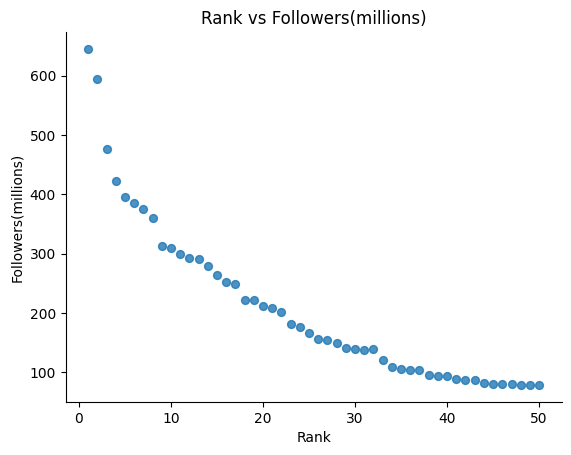

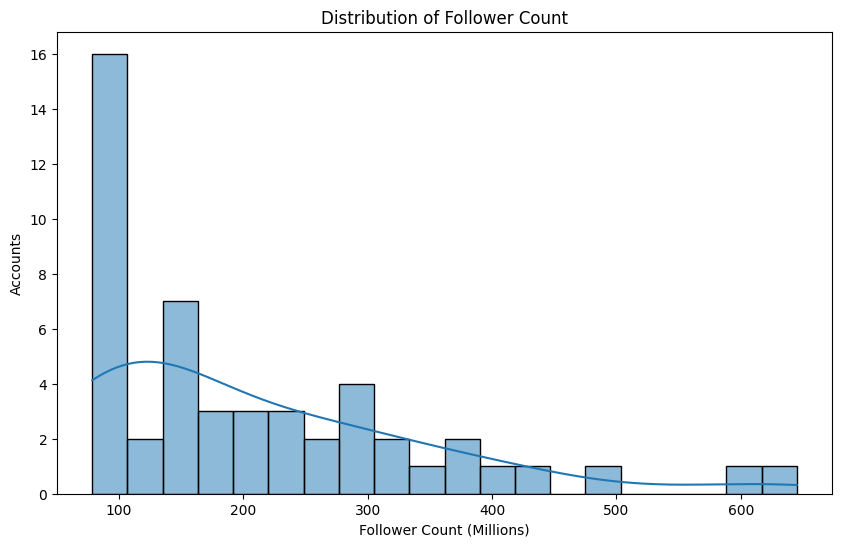

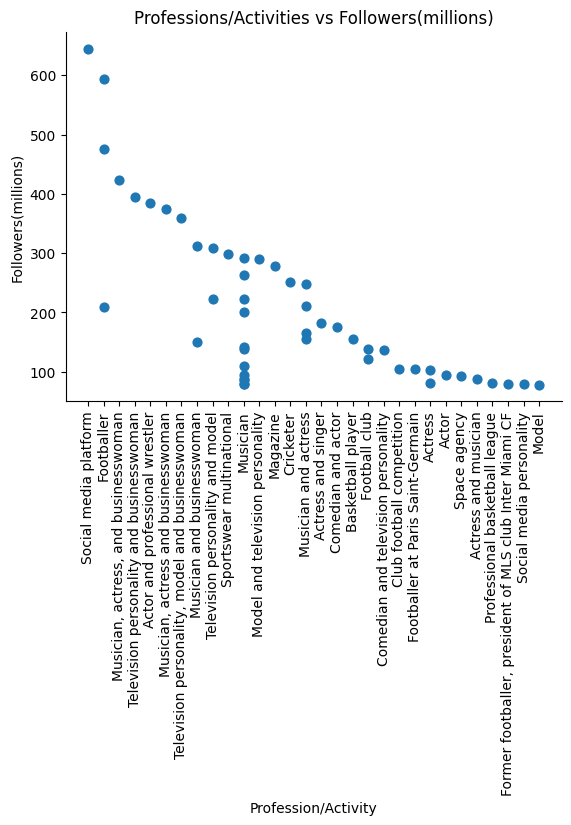

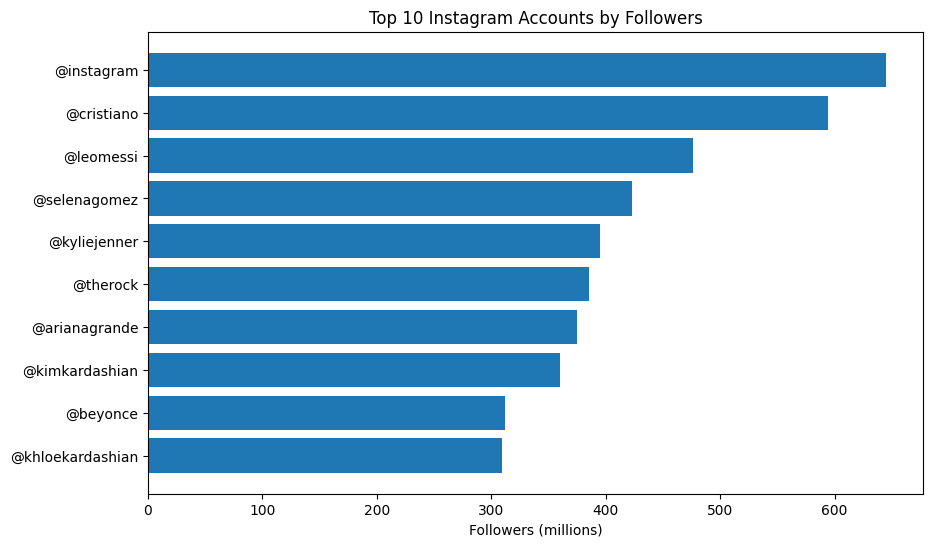

In [32]:
# Rank vs Followers(millions)
data.plot(kind='scatter', x='Rank', y='Followers(millions)', s=32, alpha=.8)
plt.title('Rank vs Followers(millions)')
plt.gca().spines[['top', 'right',]].set_visible(False)


# Analyze the distribution of Follower Coutns
plt.figure(figsize=(10, 6))
sns.histplot(data['Followers(millions)'], bins=20, kde=True)
plt.title('Distribution of Follower Count')
plt.xlabel('Follower Count (Millions)')
plt.ylabel('Accounts')
plt.show()

# Profession/Activity vs Followers(millions)
data.plot(kind='scatter', x='Profession/Activity', y='Followers(millions)', s=40, alpha=1)
plt.title('Professions/Activities vs Followers(millions)')
plt.xticks(rotation=90)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Top 10 Ranking Users
# First, sort the data by rank to get the top 10 accounts
top_10 = data.nsmallest(10, 'Rank')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_10['Username'], top_10['Followers(millions)'])
plt.xlabel('Followers (millions)')
plt.title('Top 10 Instagram Accounts by Followers')
plt.gca().invert_yaxis()
plt.show()

###Trend Analysis

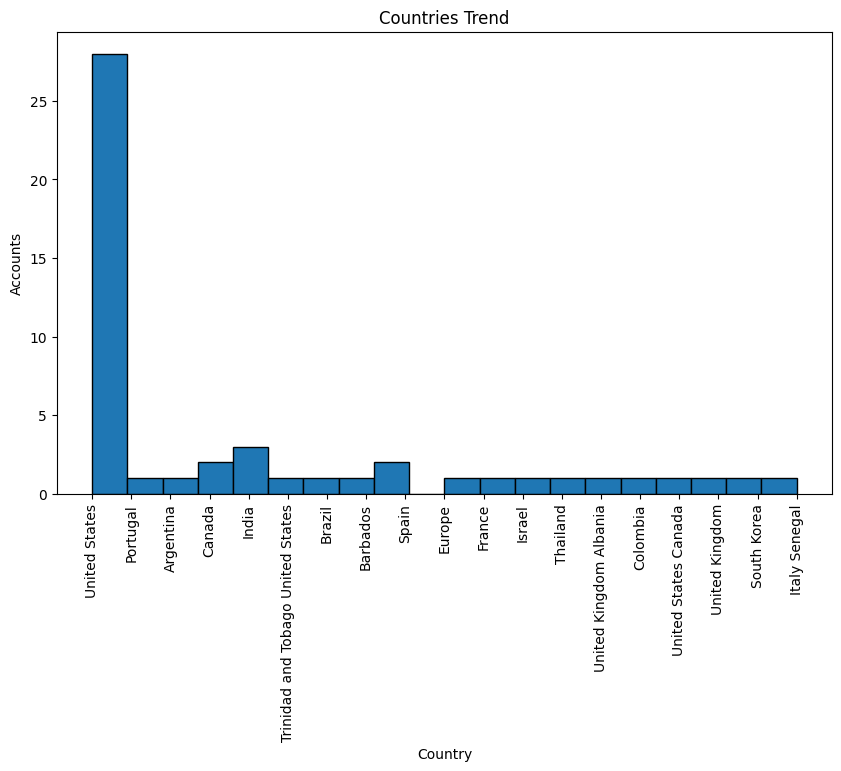

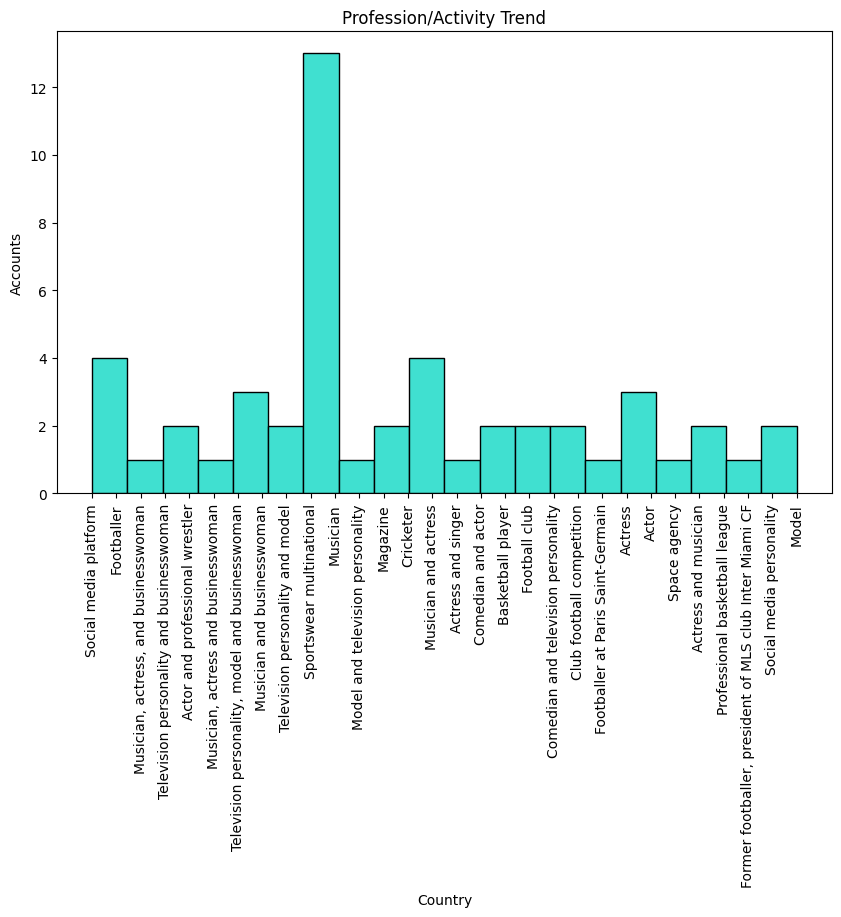

In [33]:
# Plot for Country
plt.figure(figsize=(10,6))
plt.hist(data['Country'], bins=20, edgecolor='black')
plt.title('Countries Trend')
plt.xlabel('Country')
plt.ylabel('Accounts')
plt.xticks(rotation=90)
plt.show()

# Plot for Profession/Activity
plt.figure(figsize=(10,6))
plt.hist(data['Profession/Activity'], bins=20, edgecolor='black' ,color='turquoise')
plt.title('Profession/Activity Trend')
plt.xlabel('Country')
plt.ylabel('Accounts')
plt.xticks(rotation=90)
plt.show()

##5. Key Findings and Business Impact

### Average Followers by Profession/ Activity

These findings see how Professions/Activities affect follower numbers.

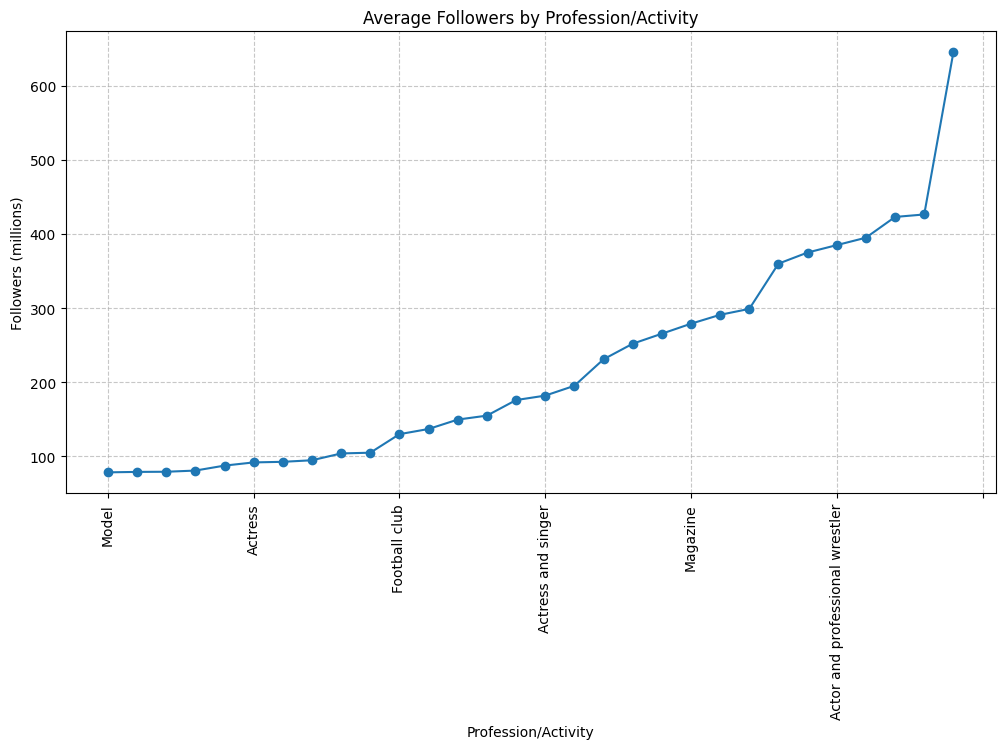

In [34]:
#Average Followers by Profession/Activity
# Calculate the average followers for each profession and sort them
profession_avg_followers = data.groupby('Profession/Activity')['Followers(millions)'].mean().sort_values()
# Plotting the data
profession_avg_followers.plot(kind='line', figsize=(12, 6), marker='o', title='Average Followers by Profession/Activity')
plt.xlabel('Profession/Activity')
plt.ylabel('Followers (millions)')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


###Top Countries with the Most Followers

This shows which countries use the social media platform the most.

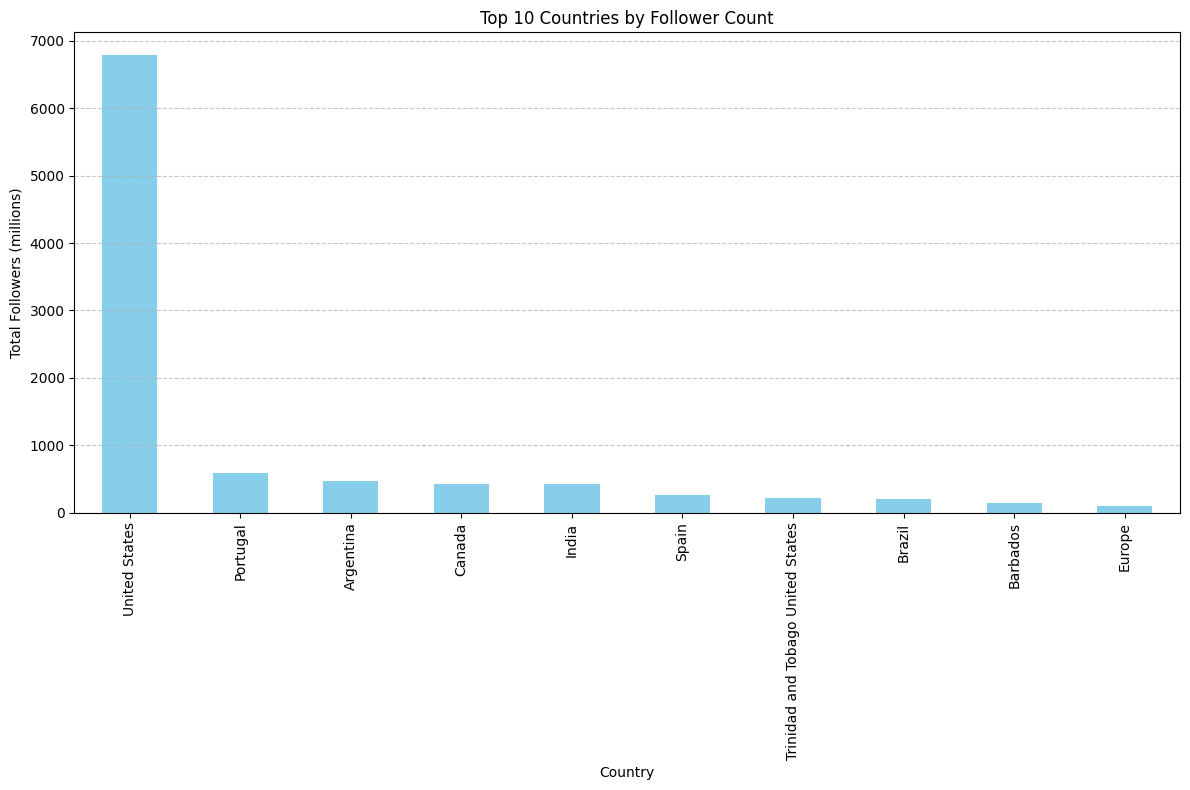

In [35]:
# Calculate the total followers for each country
country_total_followers = data.groupby('Country')['Followers(millions)'].sum()

# Sort the countries by total followers and select the top 10
top_countries = country_total_followers.sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Followers (millions)')
plt.title('Top 10 Countries by Follower Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7. Implementation of Machine Learning

**Data Overview:**


*   **Rank:** The ranking of the Instagram account.

*   **Username:** The username of the account.

* **Owner:** The owner of the account.

* **Followers(millions):** Number of followers in millions.

* **Profession/Activity:** The profession or primary activity of the account owner.

* **Country:** The country where the account owner is based.

### Categorical Encoding

In [36]:
#Categorical Encoding:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['Profession/Activity', 'Country']])

data = data.drop(columns=['Username', 'Owner'])

### Feature Scaling

In [37]:
scaler = StandardScaler()
data[['Rank', 'Followers(millions)']] = scaler.fit_transform(data[['Rank', 'Followers(millions)']])

### Splitting the Data and Model

In [40]:
# Data Preparation
data['Followers(millions)'] = data['Followers(millions)'].astype(float)
features = data.drop(columns=['Followers(millions)'])
target = data['Followers(millions)']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Defining the preprocessing steps
numerical_features = ['Rank']
categorical_features = ['Profession/Activity', 'Country']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Building the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Deriving insights
regressor = pipeline.named_steps['regressor']
preprocessor = pipeline.named_steps['preprocessor']
encoded_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

insights = pd.Series(regressor.coef_, index=encoded_feature_names.tolist() + numerical_features)

#

Mean Absolute Error: 36.53846153846155
Mean Squared Error: 1335.0591715976338
R^2 Score: nan
Model Coefficients:
Profession/Activity_Actor          6.067774
Profession/Activity_Athlete      -11.730769
Profession/Activity_Influencer    10.064103
Country_India                      1.666667
Country_UK                         1.666667
Country_USA                       -4.038462
Rank                               2.371795
dtype: float64

Insights derived from the data:
The R^2 score indicates that approximately nan% of the variability in follower counts can be explained by the model.
Influential categories in determining follower count include: Profession/Activity_Influencer, Profession/Activity_Actor, Rank.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## 8. Conclusion

In [42]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

print("Model Coefficients:")
print(insights)

Mean Absolute Error: 36.53846153846155
Mean Squared Error: 1335.0591715976338
R^2 Score: nan
Model Coefficients:
Profession/Activity_Actor          6.067774
Profession/Activity_Athlete      -11.730769
Profession/Activity_Influencer    10.064103
Country_India                      1.666667
Country_UK                         1.666667
Country_USA                       -4.038462
Rank                               2.371795
dtype: float64
